Trying to isolaate colors following this example → https://towardsdatascience.com/image-processing-with-python-color-isolation-for-beginners-3b472293335b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.color import rgb2hsv, hsv2rgb
from skimage.exposure import histogram, cumulative_distribution
from scipy.stats import cauchy, logistic
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
from skimage.color import rgb2hsv, hsv2rgb
import cv2
from scipy.signal import convolve2d

Text(0.5, 1.0, 'Climbing Wall')

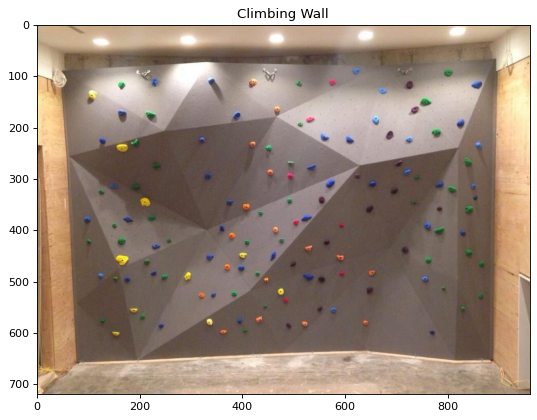

In [2]:
climbing_wall = imread('climbing_wall.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(climbing_wall)
plt.title('Climbing Wall')

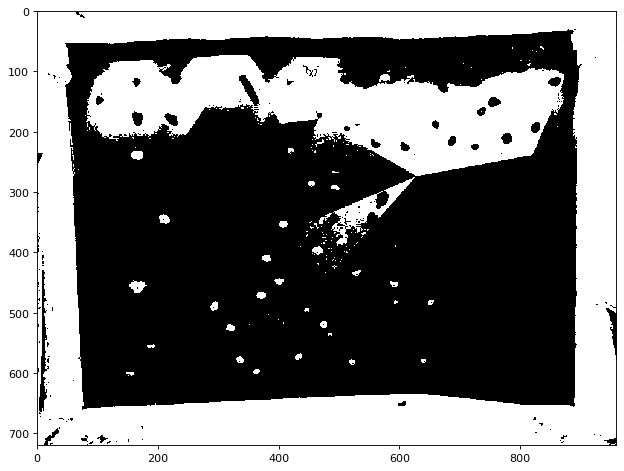

In [3]:
climbing_wall_filtered = (climbing_wall[:,:,0] > 150)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(climbing_wall_filtered, cmap = 'gray');

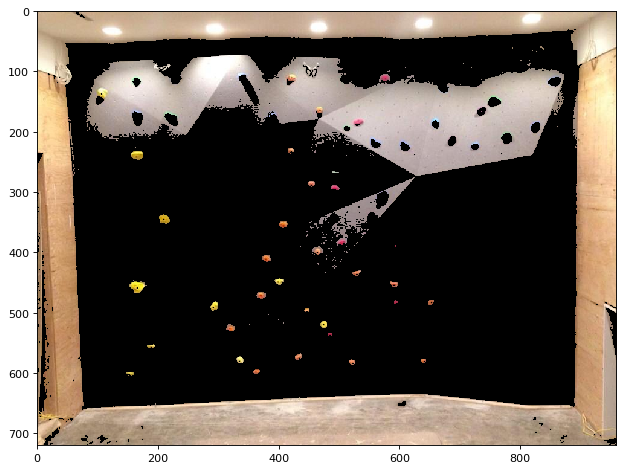

In [4]:
climbing_wall_new = climbing_wall.copy()
climbing_wall_new[:, :, 0] = climbing_wall_new[:, :, 0]*climbing_wall_filtered
climbing_wall_new[:, :, 1] = climbing_wall_new[:, :, 1]*climbing_wall_filtered
climbing_wall_new[:, :, 2] = climbing_wall_new[:, :, 2]*climbing_wall_filtered
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(climbing_wall_new);

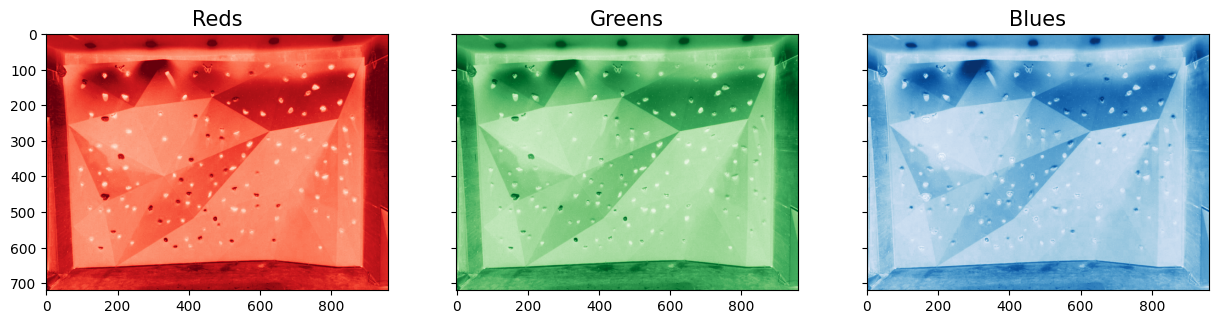

In [5]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
rgb_splitter(climbing_wall)

/Users/leonardo/Documents/UniTn/Magistrale/1° Anno/1° Semestre/Signal/Progetto/project_env/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


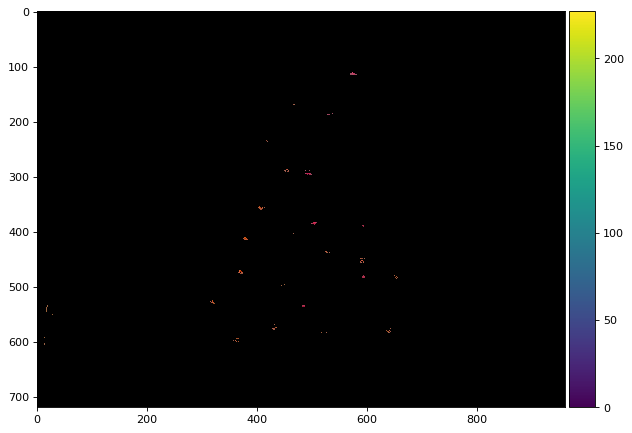

In [6]:
red_filtered = (climbing_wall[:,:,0] > 150) & (climbing_wall[:,:,1] < 100) & (climbing_wall[:,:,2] < 110)
plt.figure(num=None, figsize=(8, 6), dpi=80)
climbing_wall_new = climbing_wall.copy()
climbing_wall_new[:, :, 0] = climbing_wall_new[:, :, 0] * red_filtered
climbing_wall_new[:, :, 1] = climbing_wall_new[:, :, 1] * red_filtered
climbing_wall_new[:, :, 2] = climbing_wall_new[:, :, 2] * red_filtered
imshow(climbing_wall_new);

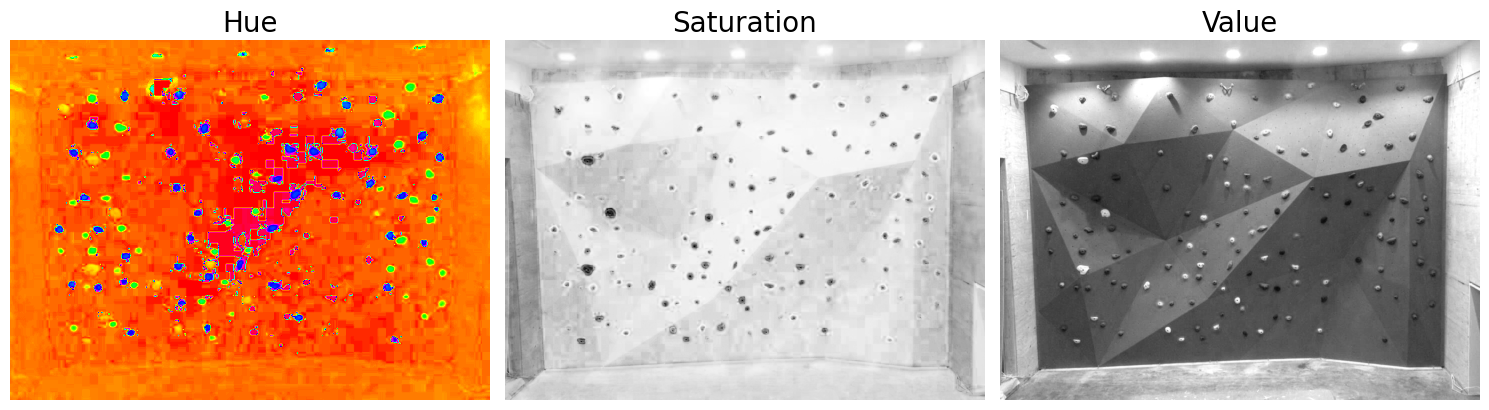

In [7]:
def display_as_hsv(image):
    img = cv2.imread(image)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_list = ['Hue','Saturation','Value']
    fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True)

    ax[0].imshow(img_hsv[:,:,0], cmap = 'hsv')
    ax[0].set_title(hsv_list[0], fontsize = 20)
    ax[0].axis('off')


    ax[1].imshow(img_hsv[:,:,1], cmap = 'Greys')
    ax[1].set_title(hsv_list[1], fontsize = 20)
    ax[1].axis('off')


    ax[2].imshow(img_hsv[:,:,2], cmap = 'gray')
    ax[2].set_title(hsv_list[2], fontsize = 20)
    ax[2].axis('off')

    fig.tight_layout()
display_as_hsv('climbing_wall.jpg')

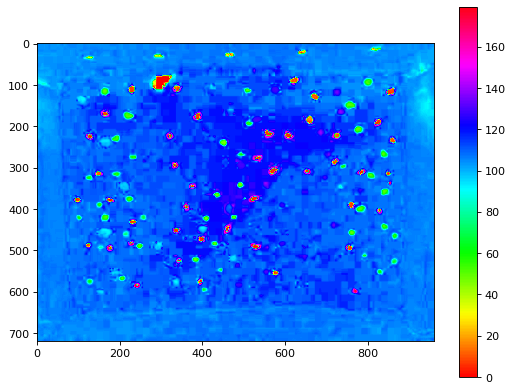

In [8]:
climbing_wall_hsv = cv2.cvtColor(climbing_wall, cv2.COLOR_BGR2HSV)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(climbing_wall_hsv[:,:,0], cmap='hsv')
plt.colorbar();

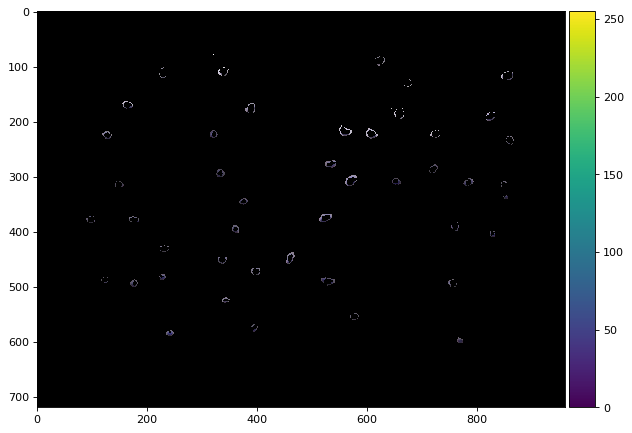

In [9]:
lower_mask = climbing_wall_hsv [:,:,0] > 150.00
upper_mask = climbing_wall_hsv [:,:,0] < 200.00
mask = upper_mask*lower_mask
red = climbing_wall[:,:,0]*mask
green = climbing_wall[:,:,1]*mask
blue = climbing_wall[:,:,2]*mask
climbing_wall_masked = np.dstack((red,green,blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(climbing_wall_masked);

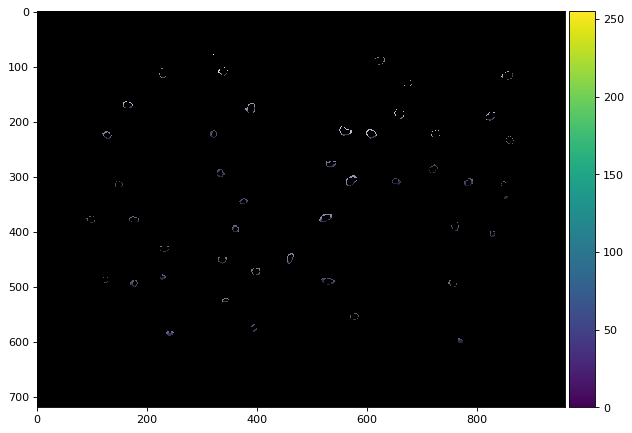

In [10]:
lower_mask = climbing_wall_hsv [:,:,0] > 160.00
upper_mask = climbing_wall_hsv [:,:,0] < 180.00
saturation = climbing_wall_hsv [:,:,1] > 0.50
mask = upper_mask*lower_mask
red = climbing_wall[:,:,0]*mask
green = climbing_wall[:,:,1]*mask
blue = climbing_wall[:,:,2]*mask
climbing_wall_masked = np.dstack((red,green,blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(climbing_wall_masked);

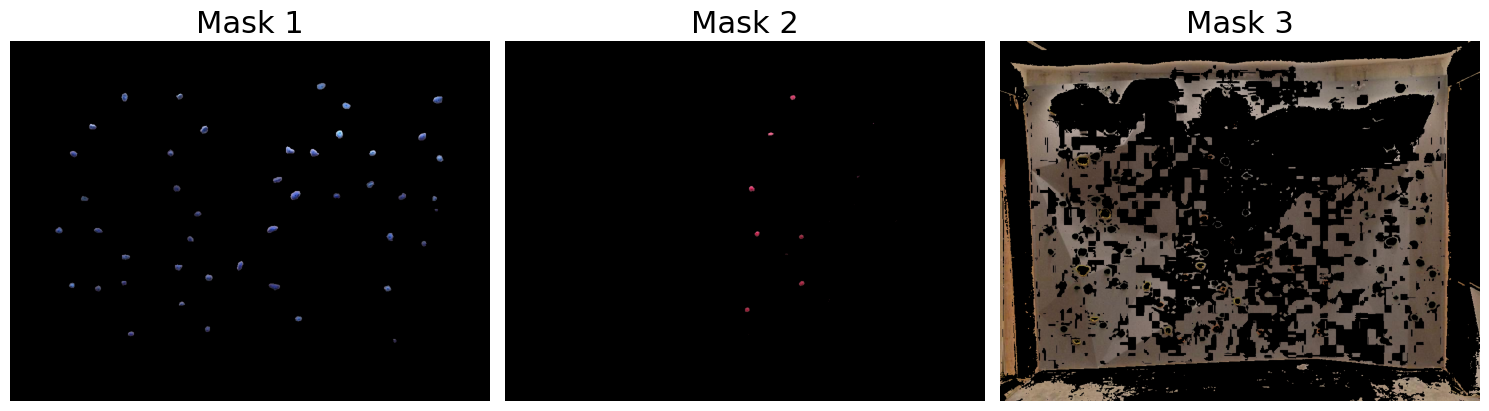

In [11]:
from skimage import color

def color_isolates(image):

    # image[:,:,:-1] selects all rows, all columns, and all color channels except the last (alpha)
    # This ensures the image passed to rgb2hsv has 3 channels (RGB)
    image_hsv = color.rgb2hsv(image)
    titles = ['Mask 1','Mask 2','Mask 3']
    f_size = 22

    #Sky Filter
    lower_mask_1 = image_hsv [:,:,0] > 0.45
    upper_mask_1 = image_hsv [:,:,0] < 0.75
    saturation_1 = image_hsv [:,:,1] > 0.15
    mask_1= lower_mask_1*upper_mask_1*saturation_1

    #Red Filter
    lower_mask_2 = image_hsv [:,:,0] > 0.90
    upper_mask_2 = image_hsv [:,:,0] < 1.00
    saturation_2 = image_hsv [:,:,1] > 0.50
    mask_2= lower_mask_2*upper_mask_2*saturation_2


    #Earth Fikter
    lower_mask_3 = image_hsv [:,:,0] > 0.05
    upper_mask_3 = image_hsv [:,:,0] < 0.15
    saturation_3 = image_hsv [:,:,1] < 0.75
    value_3 = image_hsv [:,:,2] < 0.70
    mask_3= lower_mask_3*upper_mask_3*saturation_3*value_3
    sky_filtered = np.dstack((image[:,:,0]*mask_1,
                              image[:,:,1]*mask_1,
                              image[:,:,2]*mask_1))

    red_filtered = np.dstack((image[:,:,0]*mask_2,
                              image[:,:,1]*mask_2,
                              image[:,:,2]*mask_2))

    earth_filtered = np.dstack((image[:,:,0]*mask_3,
                                image[:,:,1]*mask_3,
                                image[:,:,2]*mask_3))

    images = [sky_filtered,red_filtered,earth_filtered]

    fig, ax = plt.subplots(1, 3, figsize=(15,12))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'{titles[n]}', fontsize = f_size)
        ax.imshow(images[n])
        ax.set_axis_off()

    fig.tight_layout()


color_isolates(climbing_wall)



---
New article → https://medium.com/@sunil.veera/exploring-color-manipulation-in-images-with-opencv-masking-vs-custom-color-selection-803d9742969c


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
climbing_wall_hsv2 = cv2.cvtColor(climbing_wall, cv2.COLOR_BGR2HSV)

In [14]:
#red/orange mask
lr = np.array([40, 120, 70])
ur = np.array([80, 255, 255])
mask = cv2.inRange(climbing_wall_hsv2, lr, ur)

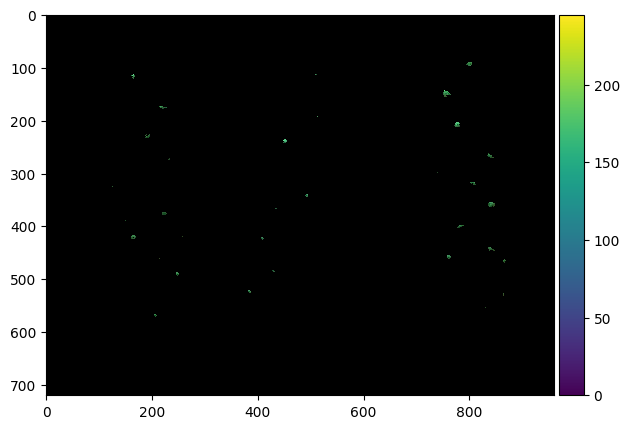

In [15]:
res = cv2.bitwise_and(climbing_wall, climbing_wall, mask=mask)
imshow(res);

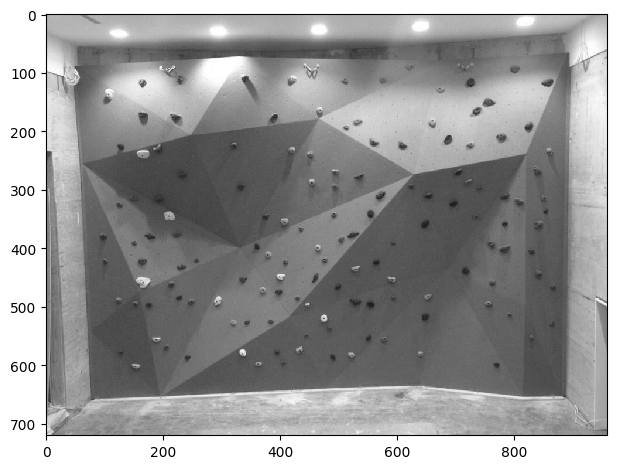

In [16]:
gray = cv2.imread(r'climbing_wall.jpg', cv2.IMREAD_GRAYSCALE)
imshow(gray)

In [17]:
bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

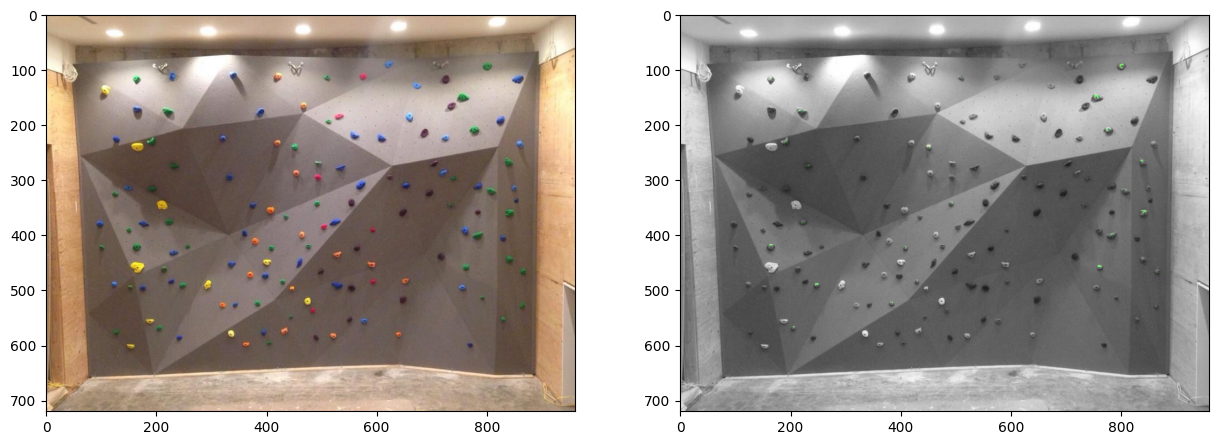

In [18]:
res2 = cv2.bitwise_or(res, bgr, mask=None)
#show the original image and res2
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(climbing_wall)
ax[1].imshow(res2)

Another method

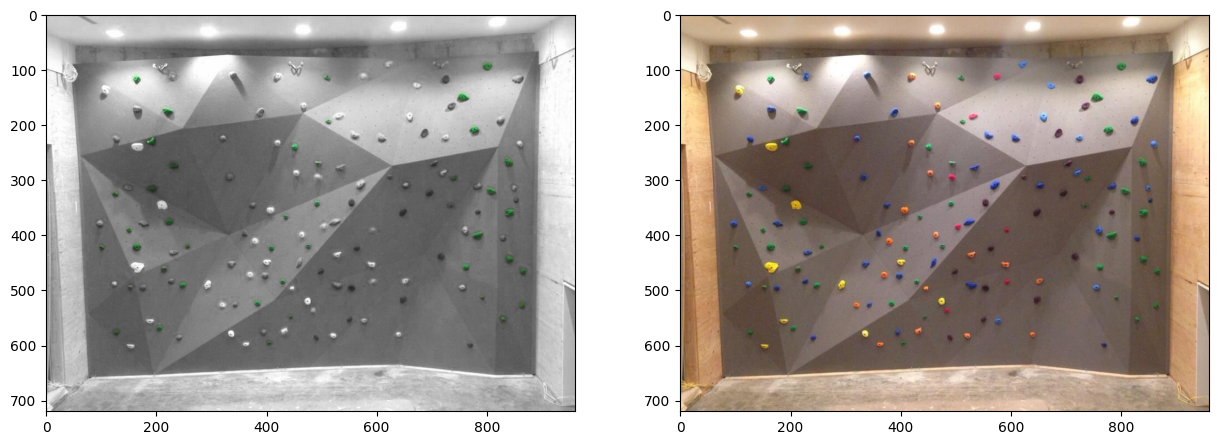

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



hsv2v2 = cv2.cvtColor(climbing_wall, cv2.COLOR_BGR2HSV)

def colorSelector(tupple_arr, climbing_wall):
    temp = climbing_wall.copy()
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            h, s, v = temp[i][j]
            flag = True
            for tup in tupple_arr:
                lower, upper = tup
                if h >= lower and h <= upper:
                    flag = False

            if flag:
                temp[i][j] = [h, 1, v]
    return temp

resv2 = colorSelector([(40, 80), (40, 80)], hsv2v2)

res2v2 = cv2.cvtColor(resv2, cv2.COLOR_HSV2BGR)
fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(res2v2)
ax[1].imshow(climbing_wall)


In [20]:
!pip install colorthief==0.2.1
from colorthief import ColorThief

color_thief = ColorThief('climbing_wall.jpg')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=10)
print(palette)
print(dominant_color)

[(110, 93, 84), (218, 205, 195), (204, 168, 137), (229, 198, 158), (177, 159, 145), (48, 64, 69), (146, 133, 136), (167, 129, 97), (123, 80, 27)]
(123, 105, 95)


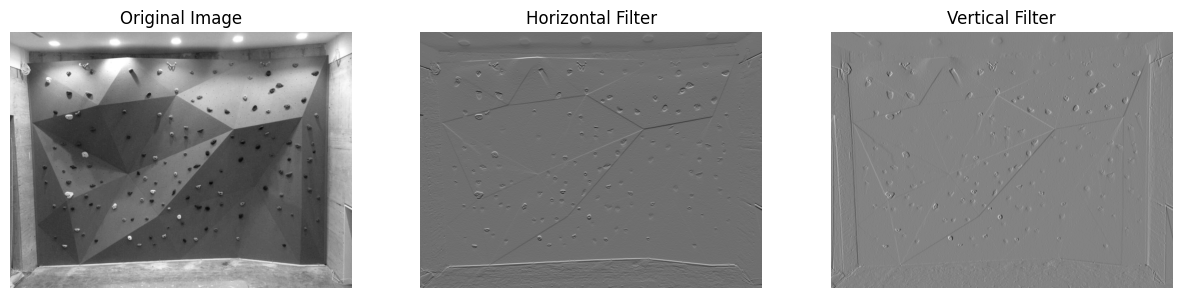

In [21]:
# Horizontal filter for convolution
def horizontal_filter(img):
    kernel_hor = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

    return convolve2d(img, kernel_hor, 'valid')


# Vertical filter for convolution
def vertical_filter(img):
    kernel_ver = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

    return convolve2d(img, kernel_ver, 'valid')


orig_img = rgb2gray(imread('climbing_wall.jpg'))
horizontal_img = horizontal_filter(orig_img)
vertical_img = vertical_filter(orig_img)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title('Original Image')
ax[0].imshow(orig_img, cmap='gray')
ax[0].set_axis_off()
ax[1].set_title('Horizontal Filter')
ax[1].imshow(horizontal_img, cmap='gray')
ax[1].set_axis_off()
ax[2].set_title('Vertical Filter')
ax[2].imshow(vertical_img, cmap='gray')
ax[2].set_axis_off()
#transform vertical_img to be useble for bitwise_ot


In [ ]:
cv2.imshow('Original Image', orig_img)
cv2.waitKey(0)

# Convert to graycsale
climbing_wall_gray = cv2.cvtColor(climbing_wall, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
climbing_wall_blur = cv2.GaussianBlur(climbing_wall_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=climbing_wall_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=climbing_wall_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=climbing_wall_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=climbing_wall_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

2024-11-19 10:41:54.906 Python[57849:7163445] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-19 10:41:54.906 Python[57849:7163445] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 